## Getting Relative Strength Index (RSI) For Markets

#### Importing Dependencies

In [22]:
import tradingeconomics as te
from stockstats import StockDataFrame
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import plotly.graph_objs as pgo

#### API login


In [15]:
te.login("jupyter:jupyter") # Signup for a free API key at https://developer.tradingeconomics.com/

'You are logged in as a jupyter:jupyter'

## Function

In [25]:
def get_rsi_6_and_12_days(symbol_1, symbol_2, plot_type,total_days_interval):
#     symbol="BTCUSD:CUR"
    total_days_interval = 180
    initDate = str((datetime.today() - timedelta(days=total_days_interval)).date())
    endDate = str((datetime.now() + timedelta(days=1)).date())
    df = te.fetchMarkets(symbol=symbol_1, initDate=initDate, endDate=endDate, output_type="df")
    stock_df = StockDataFrame.retype(df)

#     symbol="EURUSD:CUR"
    total_days_interval = 180
    initDate = str((datetime.today() - timedelta(days=total_days_interval)).date())
    endDate = str((datetime.now() + timedelta(days=1)).date())
    df2 = te.fetchMarkets(symbol=symbol_2, initDate=initDate, endDate=endDate, output_type="df")
    stock_df2 = StockDataFrame.retype(df2)

   
    
    
    def get_static_plot(df1,df2,symbol_1,symbol_2):
    
        plt.style.use('bmh')
        fig, ax = plt.subplots(figsize=(15,5))  # Create a figure and an axes.
    #     plt.style.use('seaborn-whitegrid')
        ax.plot(stock_df['rsi_6'], label=f'{symbol_1[:-4]}')  # Plot some data on the axes.
        ax.plot(stock_df2['rsi_6'], label=f'{symbol_2[:-4]}')  # Plot some data on the axes.

        ax.set_xlabel('Date')  # Add an x-label to the axes.
        ax.set_ylabel('')  # Add a y-label to the axes.
        ax.set_title(" 6 days Relative Strength Index ")  # Add a title to the axes.
        ax.legend()  # Add a legend.

        fig, ax = plt.subplots(figsize=(15,5))  # Create a figure and an axes.
    #     plt.style.use('seaborn-paper')
    #     ax.style('seaborn-paper')
        ax.plot(stock_df['rsi_12'], label=f'{symbol_1[:-4]}')  # Plot some data on the axes.
        ax.plot(stock_df2['rsi_12'], label=f'{symbol_2[:-4]}')  # Plot some data on the axes.

        # ax.plot(stock_df['rsi_12'], label='12 days RSI')  # Plot some data on the axes.

        ax.set_xlabel('Date')  # Add an x-label to the axes.
        ax.set_ylabel('')  # Add a y-label to the axes.
        ax.set_title("12 days Relative Strength Index")  # Add a title to the axes.
        ax.legend()  # Add a legend.
        
    def get_dynamic_plot(df1,df2,symbol_1,symbol_2):
         
        #Dynamic Plot 6 days

        fig = pgo.Figure()
        fig.add_trace(pgo.Scatter(x=df1.index, y= df1['rsi_6'], line=dict(color='red', width= 1), name =f'{symbol_1[:-4]}'))
        fig.add_trace(pgo.Scatter(x=df2.index, y= df1['rsi_6'], line=dict(color='blue', width= 1), name =f'{symbol_2[:-4]}'))
        # fig.add_trace(pgo.Scatter(x=df.index, y= df['lower band'], line=dict(color='green', width= 1), name ='Lower Band'))

    #     fig.add_trace(pgo.Candlestick(x = stock_df.index, open = stock_df['open'], high = stock_df['high'], low = stock_df['low'], close = stock_df['close'], name = symbol.upper() + ' Data'))

        fig.update_layout(title='6 days Relative Strength Index to ' + symbol_1[:-4].upper() + ' and ' + symbol_2[:-4].upper() , yaxis_title='')

        fig.update_xaxes(rangeslider_visible = True,
                        rangeselector = dict(
                        buttons=list([           
                            dict(count=1, label='1 Month', step='month', stepmode='todate'),
                            dict(count=3, label='3 Month', step='month', stepmode='todate'),
                            dict(count=5, label='5 Month', step='month', stepmode='todate'),
                            dict(count=7, label='7 Month', step='month', stepmode='todate'),
                            dict(label='1 Year', step='all')
                        ])))
        fig.update_layout(
            autosize=True,
            height=700,
            margin=dict(
                l=50,
                r=50,
                b=100,
                t=100
            )
        )

        fig.show()
        
        #Dynamic Plot 12 days
        
        fig = pgo.Figure()
        fig.add_trace(pgo.Scatter(x=df1.index, y= df1['rsi_12'], line=dict(color='red', width= 1), name =f'{symbol_1[:-4]}'))
        fig.add_trace(pgo.Scatter(x=df2.index, y= df1['rsi_12'], line=dict(color='blue', width= 1), name =f'{symbol_2[:-4]}'))
        # fig.add_trace(pgo.Scatter(x=df.index, y= df['lower band'], line=dict(color='green', width= 1), name ='Lower Band'))

    #     fig.add_trace(pgo.Candlestick(x = stock_df.index, open = stock_df['open'], high = stock_df['high'], low = stock_df['low'], close = stock_df['close'], name = symbol.upper() + ' Data'))

        fig.update_layout(title='12 days Relative Strength Index to ' + symbol_1[:-4].upper() + ' and ' + symbol_2[:-4].upper() , yaxis_title='')

        fig.update_xaxes(rangeslider_visible = True,
                        rangeselector = dict(
                        buttons=list([           
                            dict(count=1, label='1 Month', step='month', stepmode='todate'),
                            dict(count=3, label='3 Month', step='month', stepmode='todate'),
                            dict(count=5, label='5 Month', step='month', stepmode='todate'),
                            dict(count=7, label='7 Month', step='month', stepmode='todate'),
                            dict(label='1 Year', step='all')
                        ])))
        fig.update_layout(
            autosize=True,
            height=700,
            margin=dict(
                l=50,
                r=50,
                b=100,
                t=100
            )
        )

        fig.show()

        
        
    
    if plot_type == 'static':
        get_static_plot(stock_df,stock_df2,symbol_1,symbol_2)
        
    if plot_type == 'dynamic':
        get_dynamic_plot(stock_df,stock_df2,symbol_1,symbol_2)




## GitHub non-dynamic preview

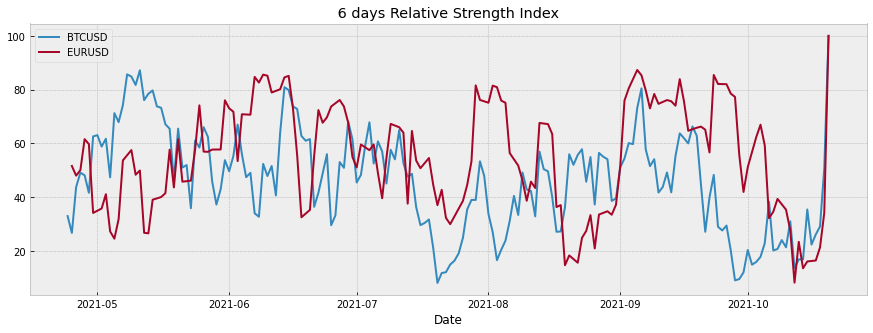

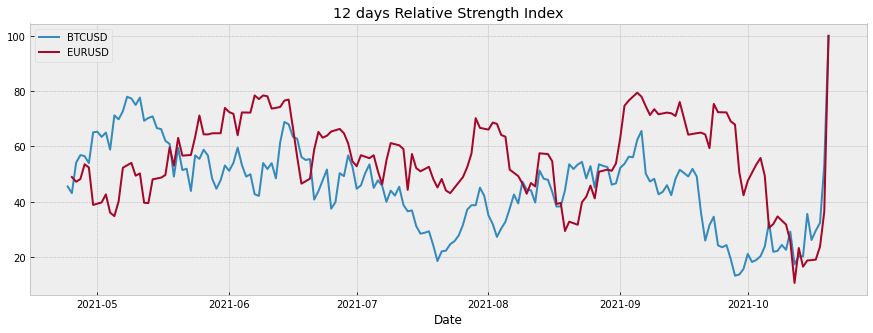

In [23]:
get_rsi_6_and_12_days(symbol_1="BTCUSD:CUR", symbol_2="EURUSD:CUR", plot_type='static',total_days_interval=180)

## Dynamic Plot uses Python's Kernel to render 
### (You can go to http://jupyter.tradingeconomics.com/ to use the dynamic plot)

In [28]:
get_rsi_6_and_12_days(symbol_1="BTCUSD:CUR", symbol_2="EURUSD:CUR", plot_type='dynamic',total_days_interval=360)